In [ ]:
map_rand_to_range(rand_float, a, b) = (rand_float - a) / (b - a)

map_vehicles_to_slowing_factor(num_vehicles) = 1 - e ^ (-0.01num_vehicles)

function generate_weights_with_factors(edge_len, speed_limit;
                                        bad_weather=false, traffic_light=false,
                                        num_vehicles=0)
    # Units
    # edge_len: meters
    # speed_limit: m/s
    # Assume that bad_weather slows a vehicle by 30% - 50%;
    # Traffic light increases the edge weights by 10% - 30%;
    # so is number of vehicles on the edge;
    
    weight = edge_len / speed_limit
    
    traffic_light && (weight *= (1 + map_rand_to_range(rand(), 0.1, 0.3)))
    
    bad_weather && (weight *= (1 + map_rand_to_range(rand(), 0.3, 0.5)))
    
    weight *= (1 + map_vehicles_to_slowing_factor(num_vehicles))
    
    return weight
end

In [159]:
using GraphPlot
using LightGraphs

In [223]:
using PyCall

In [256]:
@pyimport networkx as nx

In [298]:
@time graph, vprops, eprops, edgeDict, 
nodesLLA, highways, geohash2edgedict = CreateOSMGraphs.CreateOSMGraph("kista.osm");

getOSMData
  0.842282 seconds (8.71 M allocations: 393.788 MiB, 29.67% gc time)
intersections
  0.000258 seconds (1.51 k allocations: 186.500 KiB)
roadways
  0.000100 seconds (218 allocations: 30.406 KiB)
segmentHighways
  0.000947 seconds (10.83 k allocations: 280.859 KiB)
createGraph
  0.011472 seconds (116.37 k allocations: 4.601 MiB)
  0.858478 seconds (8.84 M allocations: 398.958 MiB, 29.11% gc time)


In [296]:
function build_networkx_graph(julia_graph)
    G = networkx.DiGraph()
    
    for (edge, _) in edgeDict
#         print(node, coord[0], coord[1])
        nx.add_path(G, [edge.src, edge.dst])
    
    end
    
    G
    
end

build_networkx_graph (generic function with 1 method)

In [307]:
locs_x = Array{Float64, 1}(nv(graph))
locs_y = Array{Float64, 1}(nv(graph))

for (k, v) in sort(vprops, by=x -> vprops[x])
    
    locs_x[v] = nodesLLA[k].coords.lon
    locs_y[v] = nodesLLA[k].coords.lat
end

In [308]:
G = build_networkx_graph(graph)

PyObject <networkx.classes.digraph.DiGraph object at 0x7f3428b891d0>

In [ ]:
pos = Dict()

for (edge, _) in edgeDict
    pos[edge.src] = (locs_x[edge.src], locs_y[edge.src])
    pos[edge.dst] = (locs_x[edge.dst], locs_y[edge.dst])
end

node_color=["r" for _ in 1:nv(graph)]

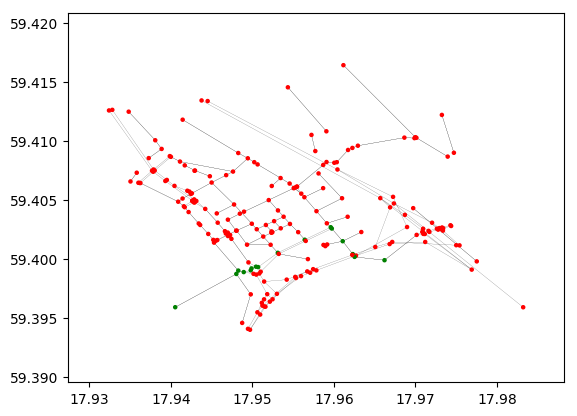

In [343]:
nx.draw_networkx(G, pos=pos, 
                    with_labels=false, 
                    node_size=5, 
                    width=0.1,
                    arrows=false,
                    node_color=node_color)

In [337]:
function build_ground_truth_path(edges)
    
    path = [edges[1].src]
    
    for edge in edges
       push!(path, edge.dst) 
    end
    
    path
end

build_ground_truth_path (generic function with 1 method)